## Метрики

In [1]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

%matplotlib inline

plt.style.use(['seaborn', 'seaborn-talk'])

In [3]:
clf_data, clf_target = datasets.make_classification(n_features=2, n_informative=2, n_classes=2,
                                                    n_redundant=0, n_clusters_per_class=1,
                                                    random_state=7)

reg_data, reg_target = datasets.make_regression(n_features=2, n_informative=1, n_targets=1,
                                                noise=5., random_state=7)

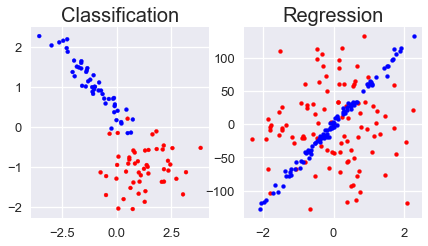

In [57]:
colors = ListedColormap(['red', 'blue'])
plt.figure(figsize=(7, 3.5))

ax1 = plt.subplot(1, 2, 1)
ax1.scatter(clf_data[:, 0], clf_data[:, 1],
            c=clf_target, cmap=colors, s=15)

ax1.set_title('Classification', fontsize=20)

ax2 = plt.subplot(1, 2, 2)
ax2.scatter(reg_data[:, 0], reg_target, c='r', s=15)
ax2.scatter(reg_data[:, 1], reg_target, c='b', s=15)

ax2.set_title('Regression', fontsize=20)

plt.show()

In [124]:
clf_train_data, clf_test_data, clf_train_label, clf_test_label = model_selection.train_test_split(clf_data,
                                                                                                  clf_target,
                                                                                                  test_size=0.3,
                                                                                                  random_state=1)
reg_train_data, reg_test_data, reg_train_label, reg_test_label = model_selection.train_test_split(reg_data,
                                                                                                  reg_target,
                                                                                                  test_size=0.3,
                                                                                                  random_state=1)

### Метрики качества в задачах классификации

In [63]:
classifier = linear_model.SGDClassifier(loss='log', random_state=1, max_iter=1000)
classifier.fit(clf_train_data, clf_train_label)

prediction = classifier.predict(clf_test_data)

probability_predictions = classifier.predict_proba(clf_test_data)

print('Предсказание SGDClassifier:')
print(f'test:\t{clf_test_label}')
print(f'pred:\t{prediction}')
print(f'prob:\t{np.round(probability_predictions[:,0], 2)}')

Предсказание SGDClassifier:
test:	[1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0]
pred:	[1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0]
prob:	[0.   1.   1.   0.   1.   0.   0.   1.   0.   1.   1.   0.   0.   0.
 1.   1.   0.   1.   1.   0.   1.   1.   0.9  1.   1.   0.99 0.58 0.
 0.03 1.  ]


In [68]:
my_acc = sum(pred == test for pred, test in zip(prediction, clf_test_label)) / len(clf_test_label)

print(my_acc)

metrics.accuracy_score(clf_test_label, prediction)

0.9333333333333333


0.9333333333333333

In [72]:
matrix = metrics.confusion_matrix(clf_test_label, prediction)
print(matrix)

[[17  1]
 [ 1 11]]


In [79]:
print('Верные')
print(f'Точность: {metrics.precision_score(clf_test_label, prediction, pos_label=0):.3f}')
print(f'Полнота:  {metrics.recall_score(clf_test_label, prediction, pos_label=0):.3f}')
print(f'F1:       {metrics.f1_score(clf_test_label, prediction, pos_label=0):.3f}')
print('=====')
print('Неверные')
print(f'Точность: {metrics.precision_score(clf_test_label, prediction):.3f}')
print(f'Полнота:  {metrics.recall_score(clf_test_label, prediction):.3f}')
print(f'F1:       {metrics.f1_score(clf_test_label, prediction):.3f}')


Верные
Точность: 0.944
Полнота:  0.944
F1:       0.944
=====
Неверные
Точность: 0.917
Полнота:  0.917
F1:       0.917


In [80]:
print(metrics.classification_report(clf_test_label, prediction))


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



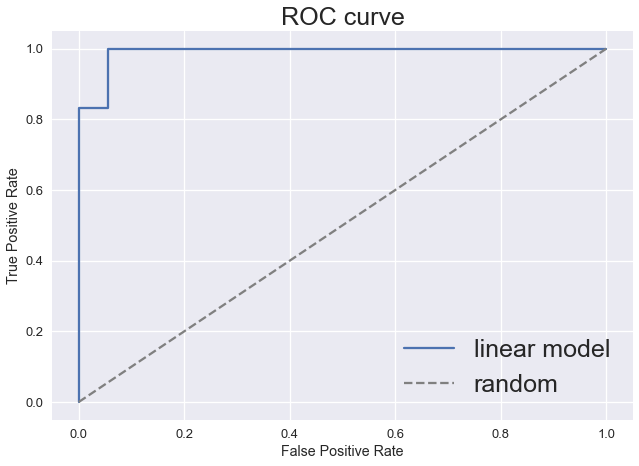

In [111]:
fpr, tpr, _ = metrics.roc_curve(clf_test_label, probability_predictions[:, 1])

fig, ax = plt.subplots()
ax.plot(fpr, tpr, label='linear model')
ax.plot([0, 1], [0, 1], '--', color='grey', label='random')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
ax.set_title('ROC curve', fontsize=25)

plt.legend(loc = "lower right", fontsize=25)

plt.show()

In [118]:
print(f'ROC-AUC class: {metrics.roc_auc_score(clf_test_label, prediction):.2f}')
print(f'ROC-AUC prob:  {metrics.roc_auc_score(clf_test_label, probability_predictions[:, 1]):.2f}')
print(f'PR-AUC: {metrics.average_precision_score(clf_test_label, prediction):.2f}')
print(f'log loss: {metrics.log_loss(clf_test_label, probability_predictions[:, 1]):.2f}')

ROC-AUC class: 0.93
ROC-AUC prob:  0.99
PR-AUC: 0.87
log loss: 0.22


### Метрики качества в задачах регрессии

In [138]:
regressor = linear_model.SGDRegressor(random_state=1, max_iter=100)
regressor.fit(reg_train_data, reg_train_label)

reg_prediction = regressor.predict(reg_test_data)

print('Предсказание SGDRegressor:')
print(f'test:\t{np.round(reg_test_label, 2)[:8]}')
print(f'pred:\t{np.round(reg_prediction, 2)[:8]}')

print(f'Mean absolute error: {metrics.mean_absolute_error(reg_test_label, reg_prediction):.2f}')
print(f'Mean square error: {metrics.mean_squared_error(reg_test_label, reg_prediction):.2f}')
print(f'Root mean square error: {metrics.mean_squared_error(reg_test_label, reg_prediction) ** 0.5:.2f}')
print(f'R2 score: {metrics.r2_score(reg_test_label, reg_prediction):.3f}')

Предсказание SGDRegressor:
test:	[  2.68   7.07 -56.43  10.08 -22.47 -19.27  59.44 -21.6 ]
pred:	[ -1.12   6.81 -51.86   5.59 -24.15  -8.22  64.26 -22.04]
Mean absolute error: 3.73
Mean square error: 23.48
Root mean square error: 4.85
R2 score: 0.990
